<img src="./utils_images/textures1.png" width=99% height="250">

# Texture Feature Extraction

Distinguishing between different textures comes naturally to the eyes. Nevertheless,
no precise definition of texture has been adopted yet. It can be seen as a similarity grouping
in an image or as natural scenes containing semi-repetitive arrangements of pixels. Several measures have also been introduced to formalise the texture. These measures can be used to identify patterns or structures in an image that are not captured by traditional features such as colour or shape.

Teaxture Feature Extraction applications:
- image classification
- object detection
- medical imaging
- industrial automation
- document image analysis
- remote sensing
- face recognition\
\
<img src="./utils_images/methods_classes.png" width=60%>

## Statistical methods
The statistical properties of the spatial distribution of grey levels are used as texture descriptors

### Grey Level Co-occurrence Matrix (GLCM)

Co-occurrence matrices are used to study pairs of pixels in certain spatial relations to each other. The value P[i,j,d,theta] is the number of times that gray-level j occurs at a distance d and at an angle theta from gray-level i. The matrix can be symmetric (pairs separated by d and -d for a direction theta are counted) or non symmetric (only distance d). The matrix has a dimension equal to the number of intensity levels in the image. If pixel pairs in the image are highly correlated, the entries in the GLCM are gathered along the diagonal of the matrix. For the classification of fine textures we use small values for d whereas for coarse textures large d values are required. 

Usually computed matrices are condensed to a few numbers (measures):

- **energy**: 
\
information on image homogeneity;
low values when the probabilities of the grey level pairs are rather similar and high values otherwise.

- **entropy**:
\
the disorder of the GLCM.

- **correlation**: 
\
the grey level linear dependence between pixels (relative to each other) at the specified positions; high values when the values are uniformly distributed in the GLCM, low values otherwise.

- **local homogeneity**:
\
the closeness of the distribution of elements in the GLCM to the GLCM diagonal; it is high when pairs of the same pixel intensity are found.

- **inertia (contrast)**:
\
it quantifies local variations present in the image \

skimage.feature.graycomatrix(image, distances, angles, levels=None, symmetric=False, normed=False) \
skimage.feature.graycoprops(P, prop='contrast')



C:\Users\kisie\AppData\Local\Temp\ipykernel_18940\90596683.py:88: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


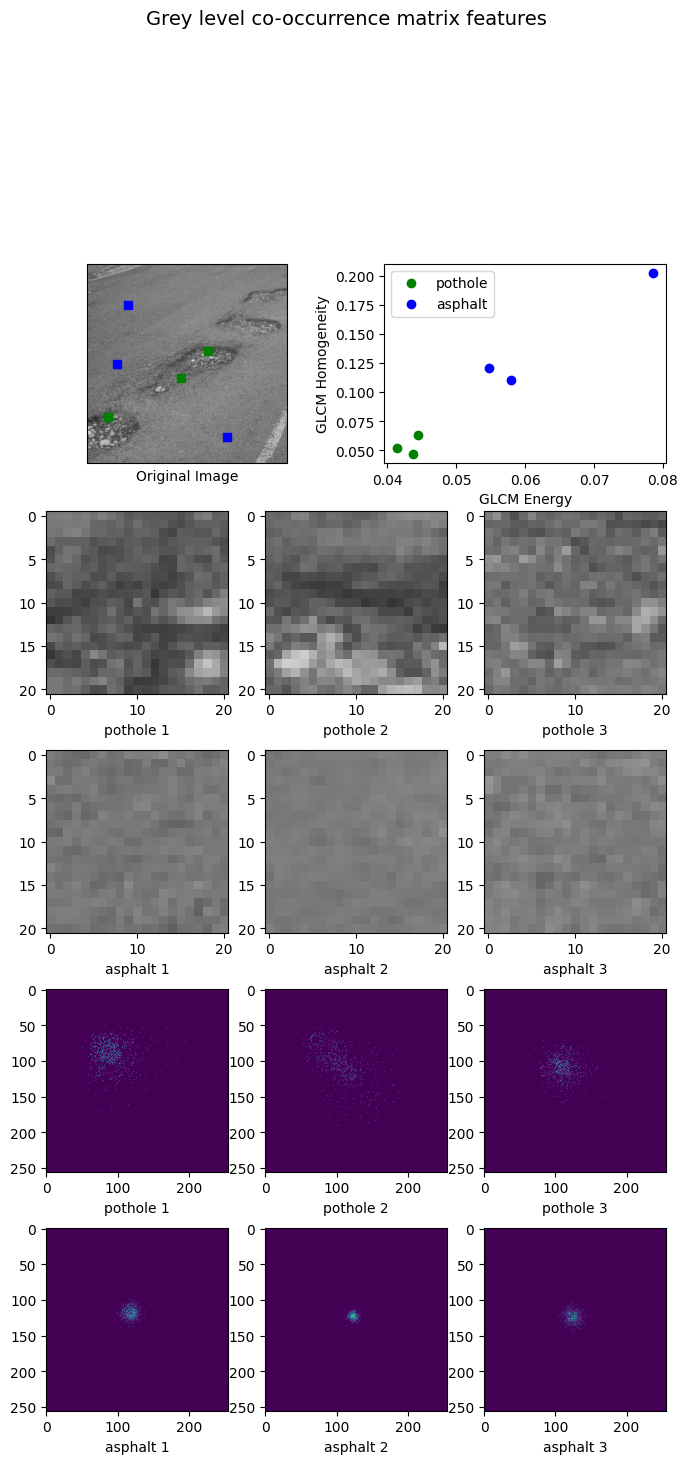

In [49]:
import matplotlib.pyplot as plt
import cv2
from skimage.feature import graycomatrix, graycoprops
from skimage import data, io

PATCH_SIZE = 21

# Read in the image and convert it to grayscale
image = cv2.imread('./data/potholed_0171.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# select some patches from pothole areas of the image
pothole_locations = [(220, 20), (120, 170), (160, 130)]
pothole_patches = []
for loc in pothole_locations:
    pothole_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

# select some patches from asphalt areas of the image
asphalt_locations = [(140, 34), (50, 50), (250, 200)]
asphalt_patches = []
for loc in asphalt_locations:
    asphalt_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

# compute some GLCM properties each patch
xs = []
ys = []
for patch in pothole_patches + asphalt_patches:
    glcm = graycomatrix(
        patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True
    )
    xs.append(graycoprops(glcm, 'energy')[0, 0])
    ys.append(graycoprops(glcm, 'homogeneity')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 15))

# display original image with locations of patches
ax = fig.add_subplot(5, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for y, x in pothole_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for y, x in asphalt_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (energy, homogeneity)
ax = fig.add_subplot(5, 2, 2)
ax.plot(xs[: len(pothole_patches)], ys[: len(pothole_patches)], 'go', label='pothole')
ax.plot(xs[len(pothole_patches) :], ys[len(pothole_patches) :], 'bo', label='asphalt')
ax.set_xlabel('GLCM Energy')
ax.set_ylabel('GLCM Homogeneity')
ax.legend()

# display the image patches
for i, patch in enumerate(pothole_patches):
    ax = fig.add_subplot(5, len(pothole_patches), len(pothole_patches) * 1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"pothole {i + 1}")

for i, patch in enumerate(asphalt_patches):
    ax = fig.add_subplot(5, len(asphalt_patches), len(asphalt_patches) * 2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"asphalt {i + 1}")


for i, patch in enumerate(pothole_patches):
    ax = fig.add_subplot(5, len(pothole_patches), len(pothole_patches) * 3 + i + 1)
    ax.imshow(graycomatrix(
        patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)[:,:,0,0])
    ax.set_xlabel(f"pothole {i + 1}")

for i, patch in enumerate(asphalt_patches):
    ax = fig.add_subplot(5, len(asphalt_patches), len(asphalt_patches) * 4 + i + 1)
    ax.imshow(graycomatrix(
        patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)[:,:,0,0])
    ax.set_xlabel(f"asphalt {i + 1}")


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

### Grey Level Run-Length Matrix (GLRLM)

### Histogram of Gradient Magnitudes

### Tamura Features

Texture features that correspond to human visual perception. Image of width W and height H will
be noted as I and the pixel at location x and y as I(x; y).

- **Coarseness**
\
the scale and repetition rates of texture.

- **Contrast**
\


- **Directionality**
\


- **Line-likeness**
\


- **Regularity**
\


- **Roughness**
\




### Local Binary Pattern (LBP)

LBP looks at points surrounding a central point and tests whether the surrounding points are greater than or less than the central point. To detect texture, a collection of LBPs over an image patch is measured and the distribution of these LBPs is analysed.

<img src="./utils_images/sphx_glr_plot_local_binary_pattern_001.png" width=60%>

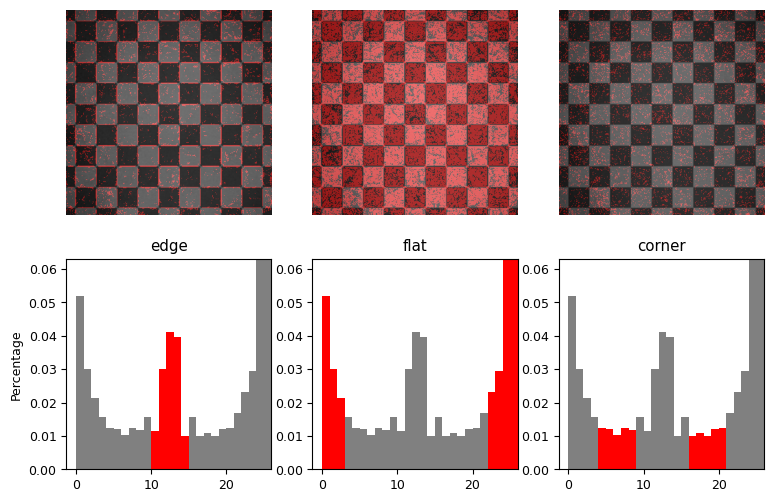

In [12]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import cv2
import numpy as np
import matplotlib.pyplot as plt


METHOD = 'uniform'
plt.rcParams['font.size'] = 9

# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


# image = data.brick()
# Read in the image and convert it to grayscale
image = cv2.imread('./data/chequered_0215.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
lbp = local_binary_pattern(image, n_points, radius, METHOD)

def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5'
    )


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4  # 1/4th of the histogram
i_34 = 3 * (n_points // 4)  # 3/4th of the histogram
corner_labels = list(range(i_14 - w, i_14 + w + 1)) + list(
    range(i_34 - w, i_34 + w + 1)
)

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

## Structural methods

Structural approaches decompose textures into elements - the primitives. Texture is considered as the replication in a more or less regular manner of a basic textural element or primitive. To describe the texture, we must describe the primitives and the placement rule. Texture primitives are often considered as regions with uniform grey levels, grey level peaks, line segments, repetition of edges in different orientations, etc. The structural approaches are usually used for regular textures and they are better for synthesis than for analysis purposes.

<img src="./utils_images/structural.png" width=60%>

###### Lin, H.-C., Wang, L.-L., & Yang, S.-N. (1999). Regular-texture image retrieval based on texture-primitive extraction. Image and Vision Computing, 17(1), 51–63. doi:10.1016/s0262-8856(98)00085-7 

## Model-based methods

aim at representing texture using mathematical models. By fitting models to texture regions, these methods can extract features that represent the texture's shape, orientation, frequency, and other properties.

### Fractal-based measures of texture

Fractal methods are based on the concept of fractals - geometric shapes or structures that exhibit self-similarity at different scales. Their overall structure is replicated when zoomed in or out, making them suitable for modeling complex and irregular patterns found in natural textures. Fractal dimension is a measure of how "complicated" a self-similar figure is and can be used to describe the roughness of different surfaces. Fractional Brownian Motion (FBM) Model is one of the ways to determine fractal dimension.

## Graph-based methods

the extraction of the texture features relies on graphs obtained from the input image.

### Shortest Paths in Graphs - 

The pixels of the input image are converted into vertices of an undirected weighted graph whose weights are defined by the image grey levels. Then, the shortest paths between pairs of pixels in different scales and orientations of the image are explored using the Dijkstra's algorithm.

###### Sá, J. J. de M., Backes, A. R., & Cortez, P. C. (2013). Texture analysis and classification using shortest paths in graphs. Pattern Recognition Letters, 34(11), 1314–1319. doi:10.1016/j.patrec.2013.04.013 